<a href="https://colab.research.google.com/github/Narenderbeniwal/Automated-Machine-Learning-using-H2O-AutoML/blob/main/H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Wed Jun 22 02:24:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [5]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 51 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.2-py2.py3-none-any.whl size=177070945 sha256=f0184b4fb01ef49674597cd4674e390828b889b4d2000ec92f125e7d5006f6e9
  Stored in directory: /root/.cache/pip/wheels/a5/2b/ae/534595df09001e1573b1046be62a3f049507307340119db65c
Successfully built h2o


In [7]:
import h2o

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6vbdb68r
  JVM stdout: /tmp/tmp6vbdb68r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6vbdb68r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_unknownUser_za1a5r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [9]:
from h2o.automl import H2OAutoML

In [10]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
churn_df

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [13]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [14]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [15]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [16]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [17]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [21]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [22]:
!nvidia-smi

Wed Jun 22 02:38:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
02:39:01.405: Project: AutoML_1_20220622_23901
02:39:01.407: Cross-validation disabled by user: no fold column nor nfolds > 1.
02:39:01.408: Setting stopping tolerance adaptively based on the training frame: 0.014276975954209098
02:39:01.410: Build control seed: 10
02:39:01.411: training frame: Frame key: AutoML_1_20220622_23901_training_py_2_sid_89c2    cols: 21    rows: 4906  chunks: 8    size: 265492  checksum: -6040719093840065882
02:39:01.411: validation frame: Frame key: py_4_sid_89c2    cols: 21    rows: 1068  chunks: 8    size: 139323  checksum: -4950659089017929767
02:39:01.411: leaderboard frame: Frame key: py_4_sid_89c2    cols: 21    rows: 1068  chunks: 8    size: 139323  checksum: -4950659089017929767
02:39:01.411: blending frame: NULL
02:39:01.411: response column: Churn
02:39:01.412: fold column: null
02:39:01.412: weights column: null
02:39:01.441: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w

,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 4.096E-5 ),"nlambda = 30, lambda.max = 15.798, lambda.min = 4.096E-5, lambda.1...",45,45,49,AutoML_1_20220622_23901_training_py_2_sid_89c2




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13580697619359042
RMSE: 0.3685199807250489
LogLoss: 0.41952451131936513
Null degrees of freedom: 4905
Residual degrees of freedom: 4860
Null deviance: 5717.716815238441
Residual deviance: 4116.374505065611
AIC: 4208.374505065611
AUC: 0.8456781147003998
AUCPR: 0.6650899442108503
Gini: 0.6913562294007995

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2954077305992897: 


,,No,Yes,Error,Rate
0,No,2713.0,871.0,0.243,(871.0/3584.0)
1,Yes,290.0,1032.0,0.2194,(290.0/1322.0)
2,Total,3003.0,1903.0,0.2366,(1161.0/4906.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.295408,0.640000,223.0
1,max f2,0.150785,0.749876,295.0
2,max f0point5,0.527613,0.646278,123.0
3,max accuracy,0.527613,0.807175,123.0
4,max precision,0.851319,1.000000,0.0
5,max recall,0.004243,1.000000,396.0
6,max specificity,0.851319,1.000000,0.0
7,max absolute_mcc,0.295408,0.489520,223.0
8,max min_per_class_accuracy,0.306457,0.765067,218.0
9,max mean_per_class_accuracy,0.290329,0.769100,226.0



Gains/Lift Table: Avg response rate: 26.95 %, avg score: 26.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010192,0.789789,3.265719,3.265719,0.880000,0.811834,0.880000,0.811834,0.033283,0.033283,226.571861,226.571861,0.031609
1,2,0.020179,0.768690,3.105159,3.186250,0.836735,0.779032,0.858586,0.795599,0.031014,0.064297,210.515916,218.624979,0.060390
2,3,0.030167,0.747482,3.105159,3.159402,0.836735,0.756958,0.851351,0.782805,0.031014,0.095310,210.515916,215.940222,0.089172
3,4,0.040155,0.732588,2.953688,3.108235,0.795918,0.740329,0.837563,0.772240,0.029501,0.124811,195.368798,210.823472,0.115882
4,5,0.050143,0.721830,2.802217,3.047280,0.755102,0.726785,0.821138,0.763186,0.027988,0.152799,180.221680,204.727993,0.140522
5,6,0.100082,0.662418,2.696187,2.872091,0.726531,0.692319,0.773931,0.727825,0.134644,0.287443,169.618698,187.209098,0.256472
6,7,0.150020,0.600501,2.378098,2.707650,0.640816,0.628131,0.729620,0.694639,0.118759,0.406203,137.809750,170.765022,0.350678
7,8,0.200163,0.535212,2.096891,2.554649,0.565041,0.570005,0.688391,0.663417,0.105144,0.511346,109.689064,155.464935,0.425967
8,9,0.300041,0.400412,1.537432,2.216038,0.414286,0.464315,0.597147,0.597140,0.153555,0.664902,53.743246,121.603775,0.499444
9,10,0.400122,0.283547,1.269767,1.979349,0.342159,0.338232,0.533367,0.532380,0.127080,0.791982,26.976654,97.934943,0.536401




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.13198718360466274
RMSE: 0.3633004040799607
LogLoss: 0.404961636641677
Null degrees of freedom: 1067
Residual degrees of freedom: 1022
Null deviance: 1217.1990037640255
Residual deviance: 864.9980558666218
AIC: 956.9980558666218
AUC: 0.8513647060986596
AUCPR: 0.643920754916847
Gini: 0.7027294121973191

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37090701507239565: 


,,No,Yes,Error,Rate
0,No,649.0,145.0,0.1826,(145.0/794.0)
1,Yes,74.0,200.0,0.2701,(74.0/274.0)
2,Total,723.0,345.0,0.2051,(219.0/1068.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.370907,0.646204,176.0
1,max f2,0.161927,0.765793,281.0
2,max f0point5,0.535181,0.650808,103.0
3,max accuracy,0.535181,0.818352,103.0
4,max precision,0.828401,1.000000,0.0
5,max recall,0.007252,1.000000,392.0
6,max specificity,0.828401,1.000000,0.0
7,max absolute_mcc,0.378552,0.511393,172.0
8,max min_per_class_accuracy,0.310445,0.762774,204.0
9,max mean_per_class_accuracy,0.370907,0.773654,176.0



Gains/Lift Table: Avg response rate: 25.66 %, avg score: 26.89 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010300,0.775666,3.189117,3.189117,0.818182,0.795994,0.818182,0.795994,0.032847,0.032847,218.911745,218.911745,0.030328
1,2,0.020599,0.749405,3.189117,3.189117,0.818182,0.764293,0.818182,0.780143,0.032847,0.065693,218.911745,218.911745,0.060656
2,3,0.030899,0.737410,2.480425,2.952887,0.636364,0.742823,0.757576,0.767703,0.025547,0.091241,148.042468,195.288653,0.081165
3,4,0.040262,0.729597,3.508029,3.081989,0.900000,0.733581,0.790698,0.759768,0.032847,0.124088,250.802920,208.198948,0.112753
4,5,0.050562,0.717507,2.480425,2.959448,0.636364,0.723514,0.759259,0.752383,0.025547,0.149635,148.042468,195.944850,0.133262
5,6,0.100187,0.653627,2.721113,2.841394,0.698113,0.689036,0.728972,0.721005,0.135036,0.284672,172.111279,184.139437,0.248148
6,7,0.150749,0.587893,2.165450,2.614680,0.555556,0.619231,0.670807,0.686870,0.109489,0.394161,116.545012,161.468015,0.327410
7,8,0.200375,0.529185,2.868200,2.677468,0.735849,0.556597,0.686916,0.654606,0.142336,0.536496,186.819997,167.746777,0.452113
8,9,0.300562,0.398388,1.493553,2.282830,0.383178,0.465575,0.585670,0.591596,0.149635,0.686131,49.355345,128.282966,0.518625
9,10,0.399813,0.285004,1.029610,1.971726,0.264151,0.336585,0.505855,0.528291,0.102190,0.788321,2.961025,97.172601,0.522578




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,alpha,iterations,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-22 02:39:05,0.000 sec,2,.16E2,46.0,1.151987,1.126855,0.0,NaN,...,,,,,,,,,,
1,,2022-06-22 02:39:05,0.102 sec,4,.98E1,46.0,1.144279,1.1195,0.0,NaN,...,,,,,,,,,,
2,,2022-06-22 02:39:05,1.819 sec,5,None,NaN,,,,5.0,...,0.66509,3.265719,0.236649,0.3633,0.404962,0.308005,0.851365,0.643921,3.189117,0.205056
3,,2022-06-22 02:39:05,0.201 sec,6,.61E1,46.0,1.132609,1.108357,0.0,NaN,...,,,,,,,,,,
4,,2022-06-22 02:39:05,0.264 sec,8,.38E1,46.0,1.115527,1.092034,0.0,NaN,...,,,,,,,,,,
5,,2022-06-22 02:39:05,0.333 sec,10,.23E1,46.0,1.091756,1.069287,0.0,NaN,...,,,,,,,,,,
6,,2022-06-22 02:39:05,0.405 sec,12,.15E1,46.0,1.060923,1.039713,0.0,NaN,...,,,,,,,,,,
7,,2022-06-22 02:39:05,0.484 sec,14,.91E0,46.0,1.024396,1.004542,0.0,NaN,...,,,,,,,,,,
8,,2022-06-22 02:39:06,0.595 sec,16,.56E0,46.0,0.985501,0.96686,0.0,NaN,...,,,,,,,,,,
9,,2022-06-22 02:39:06,0.651 sec,18,.35E0,46.0,0.948461,0.930618,0.0,NaN,...,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,1.337936,1.000000,0.124213
1,MonthlyCharges,0.759998,0.568038,0.070558
2,InternetService.Fiber optic,0.755315,0.564537,0.070123
3,Contract.Two year,0.646106,0.482913,0.059984
4,Contract.Month-to-month,0.597490,0.446576,0.055471
5,TotalCharges,0.583351,0.436008,0.054158
6,InternetService.DSL,0.577967,0.431984,0.053658
7,InternetService.No,0.371909,0.277972,0.034528
8,OnlineSecurity.No internet service,0.332309,0.248374,0.030851
9,StreamingMovies.Yes,0.316698,0.236706,0.029402



See the whole table with table.as_data_frame()


In [24]:
!nvidia-smi

Wed Jun 22 02:40:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    27W /  70W |    138MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
lb = aml.leaderboard

In [26]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20220622_23901,0.851365,0.404962,0.643921,0.226346,0.3633,0.131987
GBM_1_AutoML_1_20220622_23901,0.841328,0.417917,0.615864,0.215696,0.371123,0.137732
GBM_2_AutoML_1_20220622_23901,0.830379,0.431903,0.592001,0.231798,0.378281,0.143096
XRT_1_AutoML_1_20220622_23901,0.826203,0.43528,0.58698,0.260388,0.377694,0.142653
XGBoost_3_AutoML_1_20220622_23901,0.825298,0.438427,0.58386,0.246998,0.381356,0.145432
GBM_3_AutoML_1_20220622_23901,0.82388,0.44079,0.570048,0.247398,0.381816,0.145784
XGBoost_1_AutoML_1_20220622_23901,0.821474,0.44838,0.573193,0.253424,0.38518,0.148363
DRF_1_AutoML_1_20220622_23901,0.818766,0.474683,0.567596,0.251935,0.384109,0.147539
GBM_4_AutoML_1_20220622_23901,0.816089,0.45132,0.568649,0.245523,0.385106,0.148306
XGBoost_2_AutoML_1_20220622_23901,0.80821,0.468273,0.568662,0.253438,0.392128,0.153764


In [27]:
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [28]:
churn_pred.head()

predict,No,Yes
Yes,0.526291,0.473709
No,0.968858,0.0311423
Yes,0.594046,0.405954
No,0.951844,0.048156
No,0.827029,0.172971
Yes,0.48389,0.51611
No,0.969925,0.0300747
No,0.963735,0.0362646
Yes,0.507739,0.492261
No,0.851913,0.148087


In [29]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13060362216905352
RMSE: 0.36139123145014673
LogLoss: 0.39945094638086415
Null degrees of freedom: 1068
Residual degrees of freedom: 1023
Null deviance: 1215.8322951581063
Residual deviance: 854.0261233622876
AIC: 946.0261233622876
AUC: 0.8551502935925047
AUCPR: 0.6568208655751945
Gini: 0.7103005871850094

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2915482893394699: 


,,No,Yes,Error,Rate
0,No,601.0,195.0,0.245,(195.0/796.0)
1,Yes,54.0,219.0,0.1978,(54.0/273.0)
2,Total,655.0,414.0,0.2329,(249.0/1069.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.291548,0.637555,215.0
1,max f2,0.172727,0.767357,273.0
2,max f0point5,0.609445,0.630408,75.0
3,max accuracy,0.609445,0.810103,75.0
4,max precision,0.850399,1.000000,0.0
5,max recall,0.006553,1.000000,392.0
6,max specificity,0.850399,1.000000,0.0
7,max absolute_mcc,0.291548,0.498822,215.0
8,max min_per_class_accuracy,0.310324,0.770101,206.0
9,max mean_per_class_accuracy,0.239200,0.779233,239.0



Gains/Lift Table: Avg response rate: 25.54 %, avg score: 26.23 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010290,0.788531,3.559774,3.559774,0.909091,0.815229,0.909091,0.815229,0.036630,0.036630,255.977356,255.977356,0.035374
1,2,0.020580,0.754200,3.203796,3.381785,0.818182,0.771706,0.863636,0.793468,0.032967,0.069597,220.379620,238.178488,0.065828
2,3,0.030870,0.732588,3.559774,3.441114,0.909091,0.746218,0.878788,0.777718,0.036630,0.106227,255.977356,244.111444,0.101202
3,4,0.040225,0.721780,3.132601,3.369367,0.800000,0.726859,0.860465,0.765890,0.029304,0.135531,213.260073,236.936707,0.127993
4,5,0.050514,0.710097,2.491841,3.190612,0.636364,0.715274,0.814815,0.755580,0.025641,0.161172,149.184149,219.061186,0.148609
5,6,0.100094,0.628323,2.807520,3.000856,0.716981,0.671187,0.766355,0.713778,0.139194,0.300366,180.751952,200.085584,0.268959
6,7,0.150608,0.579272,2.102903,2.699679,0.537037,0.606506,0.689441,0.677798,0.106227,0.406593,110.290327,169.967920,0.343779
7,8,0.200187,0.518052,2.142581,2.561706,0.547170,0.546756,0.654206,0.645344,0.106227,0.512821,114.258069,156.170621,0.419856
8,9,0.300281,0.404725,1.610215,2.244543,0.411215,0.468314,0.573209,0.586334,0.161172,0.673993,61.021533,124.454258,0.501882
9,10,0.400374,0.271751,1.390641,2.031067,0.355140,0.336118,0.518692,0.523780,0.139194,0.813187,39.064051,103.106706,0.554393


In [30]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [31]:
model_ids

['GLM_1_AutoML_1_20220622_23901',
 'GBM_1_AutoML_1_20220622_23901',
 'GBM_2_AutoML_1_20220622_23901',
 'XRT_1_AutoML_1_20220622_23901',
 'XGBoost_3_AutoML_1_20220622_23901',
 'GBM_3_AutoML_1_20220622_23901',
 'XGBoost_1_AutoML_1_20220622_23901',
 'DRF_1_AutoML_1_20220622_23901',
 'GBM_4_AutoML_1_20220622_23901',
 'XGBoost_2_AutoML_1_20220622_23901']

In [32]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220622_23901


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10500442638828507
RMSE: 0.32404386491381854
LogLoss: 0.33111106090421155
Mean Per-Class Error: 0.16720704391344282
AUC: 0.9140657713893992
AUCPR: 0.796990695806688
Gini: 0.8281315427787983

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3291677951812744: 


,,No,Yes,Error,Rate
0,No,3009.0,575.0,0.1604,(575.0/3584.0)
1,Yes,230.0,1092.0,0.174,(230.0/1322.0)
2,Total,3239.0,1667.0,0.1641,(805.0/4906.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.329168,0.730679,219.0
1,max f2,0.199510,0.816476,277.0
2,max f0point5,0.534738,0.736179,139.0
3,max accuracy,0.480941,0.850387,160.0
4,max precision,0.954078,1.000000,0.0
5,max recall,0.010902,1.000000,390.0
6,max specificity,0.954078,1.000000,0.0
7,max absolute_mcc,0.329168,0.623492,219.0
8,max min_per_class_accuracy,0.318146,0.830560,223.0
9,max mean_per_class_accuracy,0.282298,0.836057,240.0



Gains/Lift Table: Avg response rate: 26.95 %, avg score: 26.88 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010192,0.902034,3.711044,3.711044,1.000000,0.920752,1.000000,0.920752,0.037821,0.037821,271.104387,271.104387,0.037821
1,2,0.020383,0.878115,3.488381,3.599713,0.940000,0.889103,0.970000,0.904928,0.035552,0.073374,248.838124,259.971256,0.072537
2,3,0.030779,0.860227,3.419982,3.539009,0.921569,0.869273,0.953642,0.892885,0.035552,0.108926,241.998161,253.900873,0.106973
3,4,0.040155,0.843723,3.388344,3.503828,0.913043,0.851237,0.944162,0.883160,0.031770,0.140696,238.834441,250.382823,0.137627
4,5,0.050143,0.824696,3.408102,3.484761,0.918367,0.835013,0.939024,0.873570,0.034039,0.174735,240.810152,248.476071,0.170550
5,6,0.100082,0.717384,3.211189,3.348253,0.865306,0.769586,0.902240,0.821684,0.160363,0.335098,221.118898,234.825343,0.321705
6,7,0.150020,0.616244,2.650746,3.116067,0.714286,0.668170,0.839674,0.770582,0.132375,0.467474,165.074562,211.606673,0.434549
7,8,0.200163,0.538812,2.293003,2.909882,0.617886,0.579889,0.784114,0.722812,0.114977,0.582451,129.300272,190.988165,0.523299
8,9,0.300041,0.378787,1.847948,2.556385,0.497959,0.460499,0.688859,0.635493,0.184569,0.767020,84.794838,155.638484,0.639229
9,10,0.400122,0.255293,1.194185,2.215661,0.321792,0.314032,0.597045,0.555087,0.119516,0.886536,19.418520,121.566145,0.665832




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1454323605054962
RMSE: 0.3813559498755673
LogLoss: 0.4384273378345664
Mean Per-Class Error: 0.24699847395613084
AUC: 0.8252978543455478
AUCPR: 0.5838596310632409
Gini: 0.6505957086910956

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.315837562084198: 


,,No,Yes,Error,Rate
0,No,622.0,172.0,0.2166,(172.0/794.0)
1,Yes,76.0,198.0,0.2774,(76.0/274.0)
2,Total,698.0,370.0,0.2322,(248.0/1068.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.315838,0.614907,205.0
1,max f2,0.150725,0.741077,284.0
2,max f0point5,0.445470,0.572378,151.0
3,max accuracy,0.544685,0.785581,115.0
4,max precision,0.954396,1.000000,0.0
5,max recall,0.009168,1.000000,390.0
6,max specificity,0.954396,1.000000,0.0
7,max absolute_mcc,0.340647,0.465326,194.0
8,max min_per_class_accuracy,0.277311,0.753149,220.0
9,max mean_per_class_accuracy,0.210021,0.762971,250.0



Gains/Lift Table: Avg response rate: 25.66 %, avg score: 26.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010300,0.873856,3.897810,3.897810,1.000000,0.903231,1.000000,0.903231,0.040146,0.040146,289.781022,289.781022,0.040146
1,2,0.020599,0.855859,2.126078,3.011944,0.545455,0.861927,0.772727,0.882579,0.021898,0.062044,112.607830,201.194426,0.055747
2,3,0.030899,0.825406,2.126078,2.716656,0.545455,0.842259,0.696970,0.869139,0.021898,0.083942,112.607830,171.665561,0.071347
3,4,0.040262,0.808971,2.728467,2.719402,0.700000,0.816859,0.697674,0.856981,0.025547,0.109489,172.846715,171.940248,0.093116
4,5,0.050562,0.797001,2.834771,2.742903,0.727273,0.803294,0.703704,0.846045,0.029197,0.138686,183.477107,174.290349,0.118535
5,6,0.100187,0.695340,2.206308,2.477113,0.566038,0.742034,0.635514,0.794525,0.109489,0.248175,120.630767,147.711304,0.199057
6,7,0.150749,0.611112,2.021087,2.324160,0.518519,0.656279,0.596273,0.748157,0.102190,0.350365,102.108678,132.416013,0.268501
7,8,0.200375,0.529850,2.279851,2.313186,0.584906,0.571885,0.593458,0.704501,0.113139,0.463504,127.985126,131.318644,0.353932
8,9,0.300562,0.381453,1.748550,2.124974,0.448598,0.449535,0.545171,0.619512,0.175182,0.638686,74.855038,112.497442,0.454807
9,10,0.399813,0.250975,1.397328,1.944341,0.358491,0.312472,0.498829,0.543292,0.138686,0.777372,39.732819,94.434093,0.507851




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-22 02:39:17,0.002 sec,0.0,0.500000,0.693147,0.500000,0.269466,1.000000,0.730534,0.500000,0.693147,0.500000,0.256554,1.000000,0.743446
1,,2022-06-22 02:39:17,0.085 sec,5.0,0.365111,0.426579,0.868121,0.709949,3.404978,0.207705,0.379486,0.449669,0.835507,0.588798,3.011944,0.245318
2,,2022-06-22 02:39:17,0.178 sec,10.0,0.349576,0.383996,0.879661,0.733760,3.562602,0.199552,0.373853,0.425759,0.835378,0.598811,2.834771,0.239700
3,,2022-06-22 02:39:17,0.256 sec,15.0,0.343597,0.369273,0.887269,0.748319,3.551999,0.187729,0.374868,0.424482,0.835649,0.593755,2.923358,0.257491
4,,2022-06-22 02:39:17,0.353 sec,20.0,0.337805,0.357364,0.895331,0.761483,3.638278,0.182430,0.376656,0.429542,0.832232,0.591564,2.698484,0.227528
5,,2022-06-22 02:39:17,0.438 sec,25.0,0.332160,0.346501,0.902732,0.776143,3.638278,0.165512,0.378215,0.432262,0.830276,0.591041,3.189117,0.238764
6,,2022-06-22 02:39:18,0.537 sec,30.0,0.328076,0.338697,0.908301,0.786742,3.565513,0.155728,0.379966,0.434291,0.829039,0.587684,3.897810,0.247191
7,,2022-06-22 02:39:18,0.628 sec,35.0,0.324044,0.331111,0.914066,0.796991,3.711044,0.164085,0.381356,0.438427,0.825298,0.583860,3.897810,0.232210



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,986.504211,1.000000,0.233303
1,MonthlyCharges,716.939026,0.726747,0.169553
2,Contract.Month-to-month,654.309265,0.663260,0.154741
3,TotalCharges,353.621277,0.358459,0.083630
4,TechSupport.No,350.555420,0.355351,0.082905
5,InternetService.Fiber optic,94.554085,0.095848,0.022362
6,Contract.Two year,92.692726,0.093961,0.021921
7,OnlineSecurity.No,86.501755,0.087685,0.020457
8,PaperlessBilling.No,83.458839,0.084601,0.019738
9,PaymentMethod.Electronic check,82.751472,0.083884,0.019570



See the whole table with table.as_data_frame()


In [33]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [34]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'gpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [35]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 18,
  'silent': True,
  'subsample': 0.8,
  'updater': 'grow_gpu_hist'},
 10000)

In [36]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220622_23901


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10500442638828507
RMSE: 0.32404386491381854
LogLoss: 0.33111106090421155
Mean Per-Class Error: 0.16720704391344282
AUC: 0.9140657713893992
AUCPR: 0.796990695806688
Gini: 0.8281315427787983

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3291677951812744: 


,,No,Yes,Error,Rate
0,No,3009.0,575.0,0.1604,(575.0/3584.0)
1,Yes,230.0,1092.0,0.174,(230.0/1322.0)
2,Total,3239.0,1667.0,0.1641,(805.0/4906.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.329168,0.730679,219.0
1,max f2,0.199510,0.816476,277.0
2,max f0point5,0.534738,0.736179,139.0
3,max accuracy,0.480941,0.850387,160.0
4,max precision,0.954078,1.000000,0.0
5,max recall,0.010902,1.000000,390.0
6,max specificity,0.954078,1.000000,0.0
7,max absolute_mcc,0.329168,0.623492,219.0
8,max min_per_class_accuracy,0.318146,0.830560,223.0
9,max mean_per_class_accuracy,0.282298,0.836057,240.0



Gains/Lift Table: Avg response rate: 26.95 %, avg score: 26.88 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010192,0.902034,3.711044,3.711044,1.000000,0.920752,1.000000,0.920752,0.037821,0.037821,271.104387,271.104387,0.037821
1,2,0.020383,0.878115,3.488381,3.599713,0.940000,0.889103,0.970000,0.904928,0.035552,0.073374,248.838124,259.971256,0.072537
2,3,0.030779,0.860227,3.419982,3.539009,0.921569,0.869273,0.953642,0.892885,0.035552,0.108926,241.998161,253.900873,0.106973
3,4,0.040155,0.843723,3.388344,3.503828,0.913043,0.851237,0.944162,0.883160,0.031770,0.140696,238.834441,250.382823,0.137627
4,5,0.050143,0.824696,3.408102,3.484761,0.918367,0.835013,0.939024,0.873570,0.034039,0.174735,240.810152,248.476071,0.170550
5,6,0.100082,0.717384,3.211189,3.348253,0.865306,0.769586,0.902240,0.821684,0.160363,0.335098,221.118898,234.825343,0.321705
6,7,0.150020,0.616244,2.650746,3.116067,0.714286,0.668170,0.839674,0.770582,0.132375,0.467474,165.074562,211.606673,0.434549
7,8,0.200163,0.538812,2.293003,2.909882,0.617886,0.579889,0.784114,0.722812,0.114977,0.582451,129.300272,190.988165,0.523299
8,9,0.300041,0.378787,1.847948,2.556385,0.497959,0.460499,0.688859,0.635493,0.184569,0.767020,84.794838,155.638484,0.639229
9,10,0.400122,0.255293,1.194185,2.215661,0.321792,0.314032,0.597045,0.555087,0.119516,0.886536,19.418520,121.566145,0.665832




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1454323605054962
RMSE: 0.3813559498755673
LogLoss: 0.4384273378345664
Mean Per-Class Error: 0.24699847395613084
AUC: 0.8252978543455478
AUCPR: 0.5838596310632409
Gini: 0.6505957086910956

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.315837562084198: 


,,No,Yes,Error,Rate
0,No,622.0,172.0,0.2166,(172.0/794.0)
1,Yes,76.0,198.0,0.2774,(76.0/274.0)
2,Total,698.0,370.0,0.2322,(248.0/1068.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.315838,0.614907,205.0
1,max f2,0.150725,0.741077,284.0
2,max f0point5,0.445470,0.572378,151.0
3,max accuracy,0.544685,0.785581,115.0
4,max precision,0.954396,1.000000,0.0
5,max recall,0.009168,1.000000,390.0
6,max specificity,0.954396,1.000000,0.0
7,max absolute_mcc,0.340647,0.465326,194.0
8,max min_per_class_accuracy,0.277311,0.753149,220.0
9,max mean_per_class_accuracy,0.210021,0.762971,250.0



Gains/Lift Table: Avg response rate: 25.66 %, avg score: 26.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010300,0.873856,3.897810,3.897810,1.000000,0.903231,1.000000,0.903231,0.040146,0.040146,289.781022,289.781022,0.040146
1,2,0.020599,0.855859,2.126078,3.011944,0.545455,0.861927,0.772727,0.882579,0.021898,0.062044,112.607830,201.194426,0.055747
2,3,0.030899,0.825406,2.126078,2.716656,0.545455,0.842259,0.696970,0.869139,0.021898,0.083942,112.607830,171.665561,0.071347
3,4,0.040262,0.808971,2.728467,2.719402,0.700000,0.816859,0.697674,0.856981,0.025547,0.109489,172.846715,171.940248,0.093116
4,5,0.050562,0.797001,2.834771,2.742903,0.727273,0.803294,0.703704,0.846045,0.029197,0.138686,183.477107,174.290349,0.118535
5,6,0.100187,0.695340,2.206308,2.477113,0.566038,0.742034,0.635514,0.794525,0.109489,0.248175,120.630767,147.711304,0.199057
6,7,0.150749,0.611112,2.021087,2.324160,0.518519,0.656279,0.596273,0.748157,0.102190,0.350365,102.108678,132.416013,0.268501
7,8,0.200375,0.529850,2.279851,2.313186,0.584906,0.571885,0.593458,0.704501,0.113139,0.463504,127.985126,131.318644,0.353932
8,9,0.300562,0.381453,1.748550,2.124974,0.448598,0.449535,0.545171,0.619512,0.175182,0.638686,74.855038,112.497442,0.454807
9,10,0.399813,0.250975,1.397328,1.944341,0.358491,0.312472,0.498829,0.543292,0.138686,0.777372,39.732819,94.434093,0.507851




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-22 02:39:17,0.002 sec,0.0,0.500000,0.693147,0.500000,0.269466,1.000000,0.730534,0.500000,0.693147,0.500000,0.256554,1.000000,0.743446
1,,2022-06-22 02:39:17,0.085 sec,5.0,0.365111,0.426579,0.868121,0.709949,3.404978,0.207705,0.379486,0.449669,0.835507,0.588798,3.011944,0.245318
2,,2022-06-22 02:39:17,0.178 sec,10.0,0.349576,0.383996,0.879661,0.733760,3.562602,0.199552,0.373853,0.425759,0.835378,0.598811,2.834771,0.239700
3,,2022-06-22 02:39:17,0.256 sec,15.0,0.343597,0.369273,0.887269,0.748319,3.551999,0.187729,0.374868,0.424482,0.835649,0.593755,2.923358,0.257491
4,,2022-06-22 02:39:17,0.353 sec,20.0,0.337805,0.357364,0.895331,0.761483,3.638278,0.182430,0.376656,0.429542,0.832232,0.591564,2.698484,0.227528
5,,2022-06-22 02:39:17,0.438 sec,25.0,0.332160,0.346501,0.902732,0.776143,3.638278,0.165512,0.378215,0.432262,0.830276,0.591041,3.189117,0.238764
6,,2022-06-22 02:39:18,0.537 sec,30.0,0.328076,0.338697,0.908301,0.786742,3.565513,0.155728,0.379966,0.434291,0.829039,0.587684,3.897810,0.247191
7,,2022-06-22 02:39:18,0.628 sec,35.0,0.324044,0.331111,0.914066,0.796991,3.711044,0.164085,0.381356,0.438427,0.825298,0.583860,3.897810,0.232210



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,986.504211,1.000000,0.233303
1,MonthlyCharges,716.939026,0.726747,0.169553
2,Contract.Month-to-month,654.309265,0.663260,0.154741
3,TotalCharges,353.621277,0.358459,0.083630
4,TechSupport.No,350.555420,0.355351,0.082905
5,InternetService.Fiber optic,94.554085,0.095848,0.022362
6,Contract.Two year,92.692726,0.093961,0.021921
7,OnlineSecurity.No,86.501755,0.087685,0.020457
8,PaperlessBilling.No,83.458839,0.084601,0.019738
9,PaymentMethod.Electronic check,82.751472,0.083884,0.019570



See the whole table with table.as_data_frame()


In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3606812246143818: 


,,No,Yes,Error,Rate
0,No,2752.0,502.0,0.1543,(502.0/3254.0)
1,Yes,284.0,916.0,0.2367,(284.0/1200.0)
2,Total,3036.0,1418.0,0.1765,(786.0/4454.0)


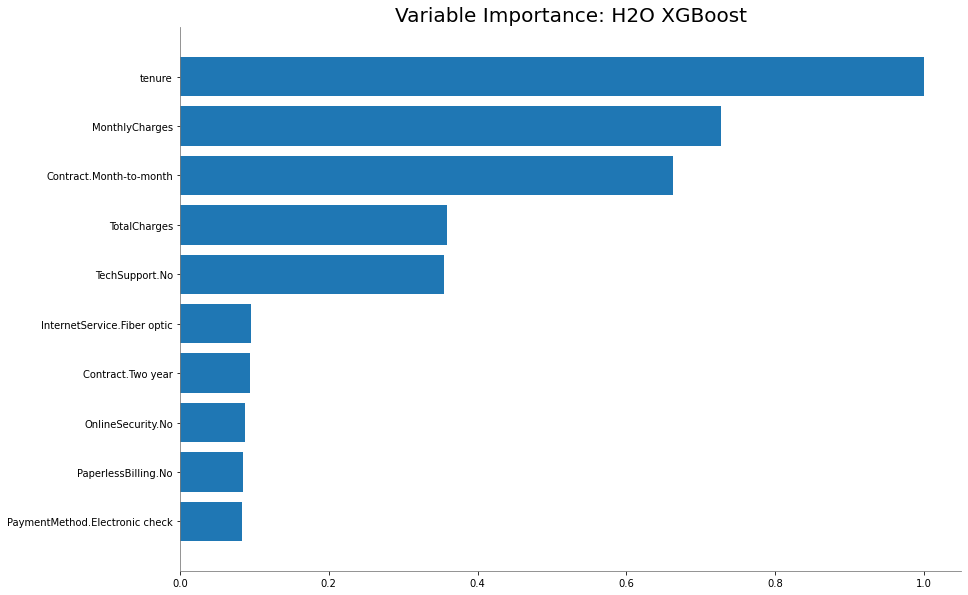

<Figure size 432x288 with 0 Axes>

In [37]:
out.varimp_plot()

In [39]:
aml.leader.download_mojo(path = "./")

'/content/GLM_1_AutoML_1_20220622_23901.zip'